# Lab Assignment 4

## Lorenzo Stigliano, s1725018



## Task 1

The following code defines the `plot_approx` function, which produces a plot of the Fourier series approximation of a given function.

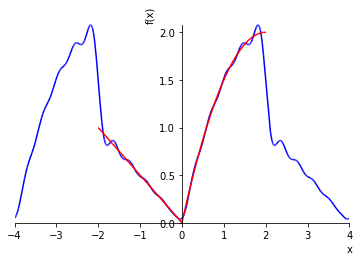

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sym
import sympy.plotting as sym_plot
sym.init_printing()
from IPython.display import display_latex

x,n = sym.symbols('x, n')

def approx_fourier(f,L,num_terms):
    x,n = sym.symbols('x, n')

    a0 = sym.Rational(1,L)*sym.integrate(f, (x,-1*L,1*L))
    an = sym.Rational(1,L)*sym.integrate(f*sym.cos((n*sym.pi*x)/L), (x,-1*L,1*L))
    bn = sym.Rational(1,L)*sym.integrate(f*sym.sin((n*sym.pi*x)/L), (x,-1*L,1*L))
    
    f10 = a0/2 + sym.Sum(an*sym.cos((n*sym.pi*x)/L)+bn*sym.sin((n*sym.pi*x)/L), (n,1,num_terms))
    f10_expr = f10.doit()
    return f10_expr

def plot_approx(f,L,num_terms):
    x,n = sym.symbols('x, n')
    f10_expression = approx_fourier(f,L,num_terms)
    f_plot = sym_plot.plot((f10_expression,(x,-2*L,2*L)), (f,(x,-1*L,1*L)), show  = False)
    f_plot[0].line_color = "blue"
    f_plot[1].line_color = "red"
    f_plot.show()

f = sym.Piecewise((2*x-0.5*x**2, (x>=0)), (-0.5*x, (x<0)))
plot_approx(f,2,10)

## Task 2

Here we ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

L= 10
a = 1
f = sym.Piecewise(
    (0, x < L/2 - 1),
    (0, x > L/2 + 1),
    (1, True )
)
cn = sym.Rational(2,L)*sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))
cn.simplify()
t = sym.symbols('t')
u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,200))

In [3]:
fps = 2 # number of frames per second

fig, ax = plt.subplots()

x_vals = np.linspace(0,L,200)

u = sym.lambdify([x, t], u_symbolic, modules='numpy')

# set up the initial frame
line, = ax.plot(x_vals, u(x_vals,0), 'k-')
plt.plot(x_vals,u(x_vals,0),'r:')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1,1)
plt.close()

# add an annotation showing the time (this will be updated in each frame)
txt = ax.text(0, 0.9, 't=0')

def init():
    line.set_ydata(u(x_vals,0))
    return line,

def animate(i):
    line.set_ydata(u(x_vals,i))  # update the data
    txt.set_text('t='+str(i))    # update the annotation
    return line, txt


ani = animation.FuncAnimation(fig, animate, np.arange(0,10*fps+1), init_func=init,
                              interval=500, blit=True, repeat=False)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [4]:
ani.save('lab4_task2.mp4', writer='ffmpeg', fps=20)